In [38]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
import numpy as np

In [43]:

data = pd.read_csv('C:/Users/ADMIN/Documents/PROJECT/TSA/TSA_DATA/Data01_02_FoodstuffCPI.csv')


In [44]:
# Calculate Z-Scores:
mean = data['CPI_rate'].mean()
std_dev = data['CPI_rate'].std()
data['z_score'] = (data['CPI_rate'] - mean) / std_dev


In [45]:
# Identify Anomalies:
threshold = 3 # Customize threshold
anomalies = data[np.abs(data['z_score']) > threshold]
print(anomalies)


Empty DataFrame
Columns: [Time, Year, Month, Foodstuff_toDecCPI, CPI_toPM, CPI_rate, z_score]
Index: []


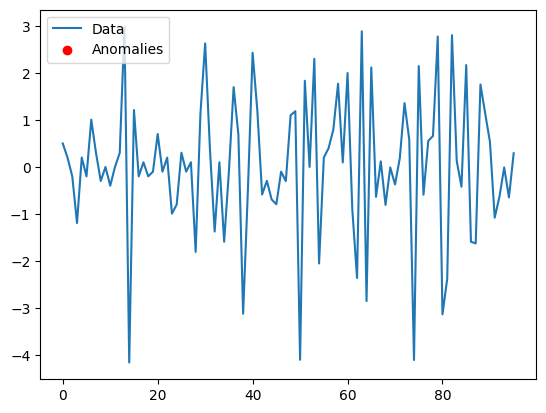

In [46]:
# Visualize Results:
import matplotlib.pyplot as plt
plt.plot(data.index, data['CPI_rate'], label='Data')
plt.scatter(anomalies.index, anomalies['CPI_rate'], color='red', label='Anomalies')
plt.legend()
plt.show()


In [47]:
# Identify Anomalies:
threshold = 2 # Customize threshold
anomalies = data[np.abs(data['z_score']) > threshold]
print(anomalies)


    Time    Year  Month  Foodstuff_toDecCPI   CPI_toPM  CPI_rate   z_score
14  15.0  2016.0    3.0               99.00  95.837367 -4.162633 -2.788870
38  39.0  2018.0    3.0               99.20  96.875000 -3.125000 -2.096645
50  51.0  2019.0    3.0               98.10  95.894428 -4.105572 -2.750803
74  75.0  2021.0    3.0               97.76  95.890142 -4.109858 -2.753662
80  81.0  2021.0    9.0              100.03  96.862593 -3.137407 -2.104922


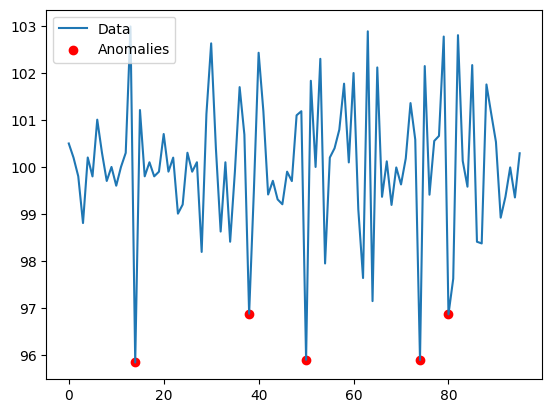

In [49]:
# Visualize Results:
import matplotlib.pyplot as plt
plt.plot(data.index, data['CPI_toPM'], label='Data')
plt.scatter(anomalies.index, anomalies['CPI_toPM'], color='red', label='Anomalies')
plt.legend()
plt.show()


Isolation Forest

In [55]:
from sklearn.ensemble import IsolationForest
X = data[['CPI_rate']].values


In [56]:
model = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = model.fit_predict(X)
anomalies = data[data['anomaly'] == -1]
print(anomalies)


ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

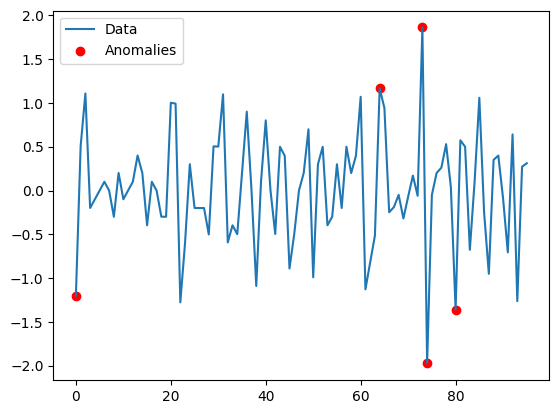

In [36]:
plt.plot(data.index, data['CPI_rate'], label='Data')
plt.scatter(anomalies.index, anomalies['CPI_rate'], color='red', label='Anomalies')
plt.legend()
plt.show()


Change point detection

In [22]:
%pip install ruptures


Note: you may need to restart the kernel to use updated packages.


In [59]:
import ruptures as rpt
#from google.colab import files
import pandas as pd 
import io
import numpy as np
#uploaded = files. upload()
from pandas import read_csv
from matplotlib import pyplot
data = pd.read_csv("TSA_DATA_02/Data02_02_Bangladesh_C.csv")


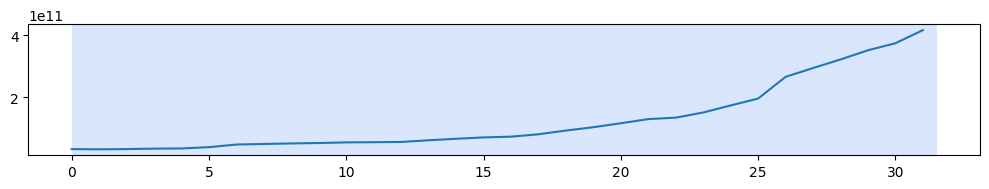

In [58]:
X = data[['gdp']].values 
# Apply the Pelt algorithm for change point detection
algo = rpt.Pelt(model="rbf").fit(X)
result = algo.predict(pen=10)
# Display the results
rpt.display(X,result)
plt.show()


In [25]:
X = data[['Indonesia']].values

X = data[['Thailand']].values

X = data[['Malaysia']].values

X = data[['Philippines']].values

X = data[['Myanmar']].values

X = data[['Cambodia']].values

X = data[['Vietnam']].values

X = data[['LaoPDR']].values

